# DATA 550 Lab 3 - Communication visualizations

There are two versions of this lab, one in Python and one in R.
The R lab will use `ggplot` and the Python lab will use `Altair`.

This is the Python version.

Each partner should choose a version to complete, though keep in mind that **you are required to alternate between completing the R labs and the Python labs** to get experience using both languages.

## Acknowledgemnts

This lab was lightly adapted from the one created by Joel Ostblom for the DSCI 531 version of Data Viz I in the 2020/21 Academic year.

<div class="alert alert-info" style="color:black">

## Submission instructions
rubric={mechanics:2}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li>Create a GitHub Repo for your group. 
      <ul>
          <li>Keep this organized, i.e. with a separate clearly marked folder for each assignment.</li>
    </ul>
  </li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab.</li>

  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/folder_path/DATA_550_labX_groupY.</li>
    </ul>
  </li>
  <li>Upload a <code>.html</code> version of your assignment to Canvas.
    <ul>
      <li> Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`</li>
      <li> Convert your notebook to .html format using `File -> Save and Export Notebook As -> HTML`</li>
      <li> Submit and double check that your have submitted the correct file to Canvas </li>
    </ul>
  </li>
</ul>
</div>

### GITHUB LINK:
https://github.com/Christian-Ji/data_550_Dataviz_1.git

In [1]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
# alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('data_server')

## 0. So we meet again...

I am sure you have heard, turns out Bestflix did not make it. Copyright issues they said, can you believe it?? I can't, there must have been more to this story... And the only other person with knowledge of this enterprise was... YOU!

In the spirit of a true comic book criminal, I will scale my revenge for this set back completely out of proportion and attempt world dominion. Don't worry, there will be no blood shed, I operate with class so my plan here is to brainwash people into thinking that I am actually good for them and then reap personal benefits once in power, creative isn't it?

To convince the pleb... I mean honorary citizens of the world to vote for me, I have made several key visualizations showing what an ideal candidate I am. The only way to stop me (hmm why am I telling you this again...) is to debunk these visualizations and show voters the errors of my ways (this is clearly a fictional scenario since we are assuming that each person acts rationally and is convinced by data).

Below is my publicly distributed campaign material covering these four main area:

1. The current dramatic increase in job dissatisfaction
2. My previous record on increasing job wages for all 
3. Guns to the people
4. My great approval rating

For each figure that I have made, I have also included the underlying data (imagine what a wonderful world it would be if that actually happened in real life...). You can find these datasets in your lab repo). For each question in this lab, your team has the following three tasks:

1. Decide if you think my plot and my claim is misleading or not, why you think so, and how you would improve it in your version of the same figure (unless you think mine is already good). In addition to what we are learning this week, you will need to draw on your knowledge from last week for when certain plots are suitable and which are common pitfalls to avoid.
2. To earn the people's trust, you need to recreate my plot to show that you know what I did. This includes axis labels, legends, colors, titles, figure size, everything as close as possible to the images I have pasted for each question below.
3. Create your own better version of the same figure. Make sure that your choices are motivated in writing in point 1.


# 1. Dramatic decline in job satisfaction

## The data

The `cities-job-satisfaction.csv` dataset
contains (fictional) data from different cities around the world.
In this data it was measured which proportion of people reported
that they were unsatisfied with their work situation
this year compared to last year.
Each data point is a different city,
and the value indicates the proportion of dissatisfied workers.

## My plot


### Altair

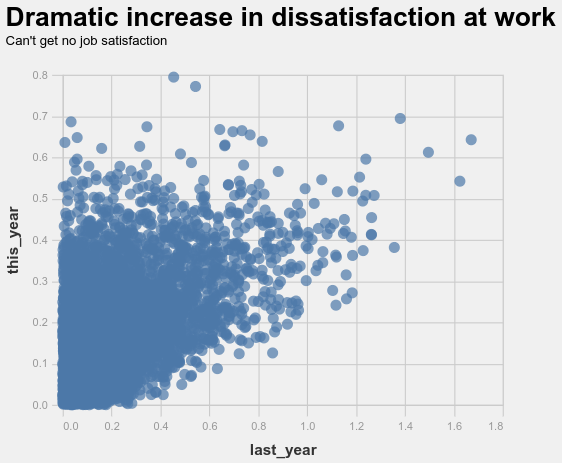

## My claim

You can clearly see in this plot
that people are dramatically more dissatisfied at work
this year compared to last year.
I have used transparency for the dots
to prevent overplotting/oversaturation,
so this means that the entire dark area
has an even amount of cities throughout.
In other words,
there are as many cities that increased from ~0% to ~40%
dissatisfaction as there are cities that stayed around 0%.
That's atrocious!

<div class="alert alert-info" style="color:black">

### Question 1.1
rubric={reasoning:2,writing:1}

<ul>
<li>Explain which mistakes (if any) I have done in my plot and provide an interpretation of the data that is more correct than mine. Be brief and clear in your answer.</li>
<li>You might have some ideas just from looking at my plot, but you will likely need to do some investigation yourself to answer this question fully. You can reference your improved plot as needed.</li>
</ul>
    
</div>

Transparency doesn’t mean equal counts: darker areas just mean more overlapping points (overplotting). The plot shows most cities are low in both years, with only some higher this year, so it doesn’t prove a dramatic overall increase.

<div class="alert alert-info" style="color:black">

### Question 1.2
rubric={accuracy:2}

<h4>Python</h4>
<p>Recreate the Altair version of the plot. Your plot should look as close as possible to mine in the image above.</p>
    
</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


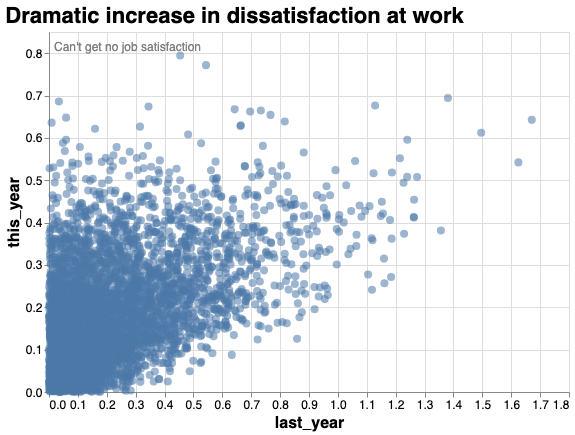

In [2]:
# YOUR ANSWER HERE
import pandas as pd
import altair as alt

cities = pd.read_csv("data/cities-job-satisfaction.csv")

base = (
    alt.Chart(cities, title="Dramatic increase in dissatisfaction at work")
    .mark_circle(opacity=0.55, size=65)
    .encode(
        x=alt.X("last_year:Q", title="last_year", scale=alt.Scale(domain=[0, 1.8])),
        y=alt.Y("this_year:Q", title="this_year", scale=alt.Scale(domain=[0, 0.85])),
    )
    .properties(width=520, height=360)
)

# subtitle as a text layer (no config here!)
subtitle = (
    alt.Chart(pd.DataFrame({"t": ["Can't get no job satisfaction"]}))
    .mark_text(align="left", dx=-255, dy=-165, fontSize=12, color="gray")
    .encode(text="t:N")
    .properties(width=520, height=360)
)

chart_12 = (base + subtitle).configure_title(
    fontSize=22, anchor="start"
).configure_axis(
    titleFontSize=16, labelFontSize=12
)

chart_12


<div class="alert alert-info" style="color:black">

### Question 1.3
rubric={viz:2}

<h4>Python</h4>
<p>Improve my Altair plot. Chose the best type of plot to accurately reveal what the data looks like. Design the plot to be an effective plot for communication purposes, this includes proper figure size, axis/figure titles, font sizes, colors, etc.</p>
    
</div>

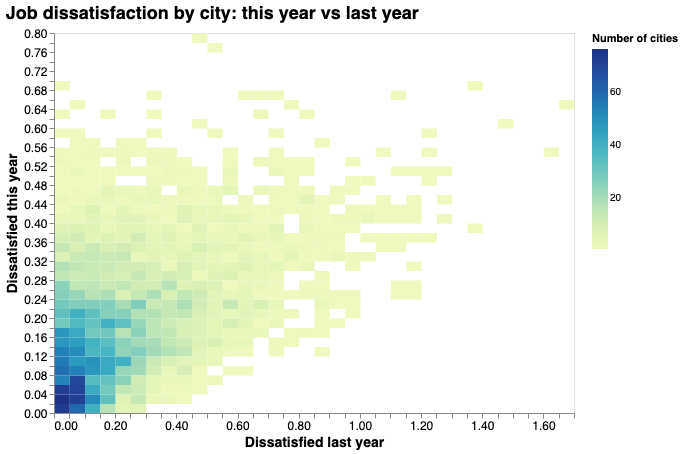

In [3]:
# YOUR ANSWER HERE
import pandas as pd
import altair as alt

cities = pd.read_csv("data/cities-job-satisfaction.csv")

chart_13 = (
    alt.Chart(cities, title="Job dissatisfaction by city: this year vs last year")
    .mark_rect()
    .encode(
        x=alt.X("last_year:Q", bin=alt.Bin(maxbins=45), title="Dissatisfied last year"),
        y=alt.Y("this_year:Q", bin=alt.Bin(maxbins=45), title="Dissatisfied this year"),
        color=alt.Color("count():Q", title="Number of cities"),
        tooltip=[
            alt.Tooltip("count():Q", title="Cities"),
        ],
    )
    .properties(width=520, height=380)
    .configure_title(fontSize=18, anchor="start")
    .configure_axis(titleFontSize=14, labelFontSize=12)
)

chart_13

# 2. I will keep raising wages for all

## The data

The `wages.csv` dataset
contains (fictional) data from different companies 
in the city where I have been the mayor for the last few years.
Each datapoint represents the average salary at a company.
All the major companies in this city were surveyed
both before I was elected and after a few years of my governing.
However,
this is not paired data,
some companies are different from "before" and "after",
so you do not need to do a paired analysis.

## My plots


### Altair

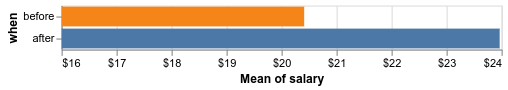

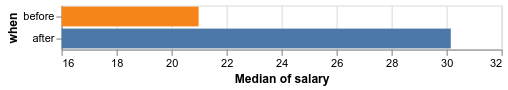

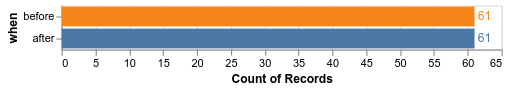


## My claim

As you can see,
I have been able to produce a significant increase
in the average salary for workers in my city.
This high raise almost certainly entails that all (or almost all)
workers are receiving a higher payment
than what they were before I started to govern.
But since I know you are going to ask me for more robust estimates,
I have also provided the median increase
(which is even more notable)
and the number of workers in each group
(so that you can see that the samples are balanced).

<div class="alert alert-info" style="color:black">

### Question 2.1
rubric={reasoning:2,writing:1}

<ul>
<li>Explain which mistakes (if any) I have done in my plot and provide an interpretation of the data that is more correct than mine. Be brief and clear in your answer.</li>
<li>You might have some ideas just from looking at my plot, but you will likely need to do some investigation yourself to answer this question fully. You can reference your improved plot as needed.</li>
</ul>
    
</div>

The plots are misleading because they only show two summary numbers (mean/median) and hide the spread and overlap of salaries in each group. A higher mean/median does not imply that all or almost all workers earn more after, especially since this is not paired data (different companies can appear in each group). A more accurate interpretation is: the typical (average/median) company salary is higher in the “after” group, but we cannot conclude that most individual salaries increased without showing the full distributions (e.g., box/violin/histograms) and the overlap between groups.

<div class="alert alert-info" style="color:black">

### Question 2.2
rubric={accuracy:2}

<h4>Python</h4>
<p>Recreate the Altair versions of my three plots in one cell each. Your plots should look as close as possible to mine in the images above.</p>
    
</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


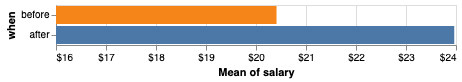

In [4]:
# YOUR ANSWER HERE
import pandas as pd
import altair as alt

# Load the dataset (replace with your actual file path)
wages = pd.read_csv("data/wages.csv") 

# Your plotting code
plot1 = alt.Chart(wages).mark_bar().encode(
    x=alt.X('mean(salary):Q', 
            title='Mean of salary', 
            scale=alt.Scale(domain=[16, 24]), 
            axis=alt.Axis(format='$')), 
    y=alt.Y('when:N', title='when', sort=['before', 'after']),
    color=alt.Color('when:N', legend=None, scale=alt.Scale(range=['#4c78a8', '#f58518']))
).properties(
    width=400,
    height=40
)

plot1

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


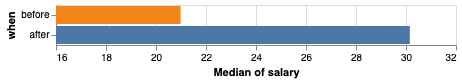

In [5]:
# YOUR ANSWER HERE
plot2 = alt.Chart(wages).mark_bar().encode(
    x=alt.X('median(salary):Q', 
            title='Median of salary', 
            scale=alt.Scale(domain=[16, 32])),
    y=alt.Y('when:N', title='when', sort=['before', 'after']),
    color=alt.Color('when:N', 
                    legend=None, 
                    scale=alt.Scale(domain=['before', 'after'], 
                                   range=['#f58518', '#4c78a8']))
).properties(
    width=400,
    height=40
)

plot2

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


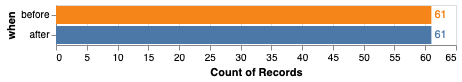

In [6]:
# YOUR ANSWER HERE
bars = alt.Chart(wages).mark_bar().encode(
    x=alt.X('count():Q', title='Count of Records', scale=alt.Scale(domain=[0, 65])),
    y=alt.Y('when:N', title='when', sort=['before', 'after']),
    color=alt.Color('when:N', 
                    legend=None, 
                    scale=alt.Scale(domain=['before', 'after'], 
                                   range=['#f58518', '#4c78a8']))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3 
).encode(
    text='count():Q'
)

plot3 = (bars + text).properties(
    width=400,
    height=40
)

plot3

<div class="alert alert-info" style="color:black">

### Question 2.3
rubric={viz:2}

<h4>Python</h4>
<p>Improve my Altair plots. Chose the best type of plot to accurately reveal what the data looks like. Design the plot to be an effective plot for communication purposes, this includes proper figure size, axis/figure titles, font sizes, colors, etc. You can either make a single or several plots, depending on what you think is needed.</p>
    
</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


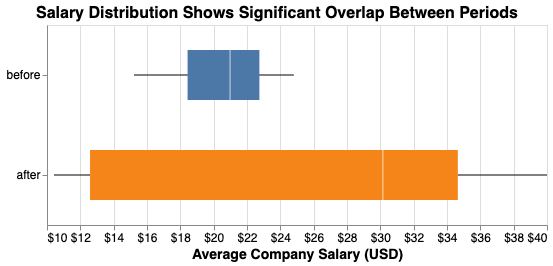

In [7]:
# YOUR ANSWER HERE
import pandas as pd
import altair as alt

# Load the data
wages = pd.read_csv('data/wages.csv')

# Use mark_boxplot for Altair 4 compatibility
# This shows the median, quartiles, and outliers clearly
boxplot = alt.Chart(wages).mark_boxplot(size=50, extent='min-max').encode(
    x=alt.X('salary:Q', 
            title='Average Company Salary (USD)', 
            axis=alt.Axis(format='$'),
            scale=alt.Scale(zero=False)),
    y=alt.Y('when:N', title=None, sort=['before', 'after']),
    color=alt.Color('when:N', 
                    legend=None, 
                    scale=alt.Scale(range=['#f58518', '#4c78a8']))
).properties(
    width=500,
    height=200,
    title='Salary Distribution Shows Significant Overlap Between Periods'
)

boxplot.configure_title(
    fontSize=16,
    anchor='start',
    dx=30
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)

# 3. Guns to the people

## The data

The `guns-r-us.csv` dataset contains yearly data
for the number of murders by firearms in Florida.

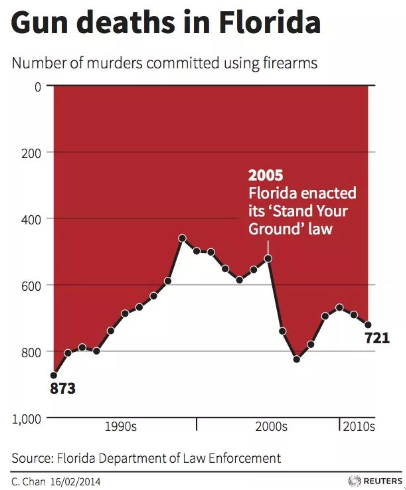

## My plots

### Altair

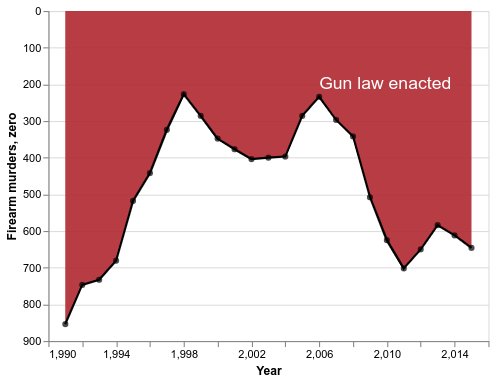


## My claim

As you can see,
just after the gun law in Florida was enacted,
deaths from firearms plummeted.
I don't really think there is much else to discuss here.


<div class="alert alert-info" style="color:black">

### Question 3.1
rubric={reasoning:2,writing:1}

<ul>
<li>Explain which mistakes (if any) I have done in my plot and provide an interpretation of the data that is more correct than mine. Be brief and clear in your answer.</li>
<li>You might have some ideas just from looking at my plot, but you will likely need to do some investigation yourself to answer this question fully. You can reference your improved plot as needed.</li>
</ul>
    
</div>

The plot contains a significant visualization error by using an inverted y-axis where the zero is at the top and values increase downwards. This manipulation tricks the eye into perceiving a downward trend as a decrease in deaths, when in reality, the line moving "down" signifies a sharp increase in firearm murders. By filling the area between the zero line and the data points with red, the chart creates a "curtain" or "bleeding" effect that masks the fact that deaths actually surged immediately after the 2005 gun law was enacted. A more correct interpretation is that the previous downward trend in murders was reversed following the enactment of the law, leading to a substantial rise in firearm-related deaths.

<div class="alert alert-info" style="color:black">

### Question 3.2
rubric={accuracy:2}

<h4>Python</h4>
<p>Recreate the Altair version of the plot. Your plot should look as close as possible to mine in the image above.</p>
    
</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


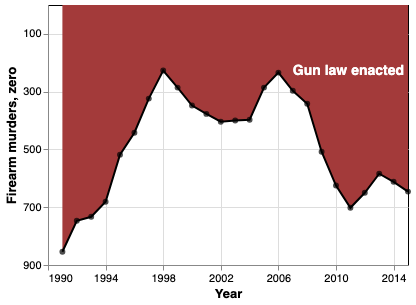

In [8]:
# YOUR ANSWER HERE
import pandas as pd
import altair as alt

guns = pd.read_csv("data/guns-r-us.csv").rename(
    columns={"Year": "year", "Firearm murders": "murders"}
)

x_enc = alt.X(
    "year:Q",
    title="Year",
    scale=alt.Scale(domain=[1990, 2015]),
    axis=alt.Axis(values=list(range(1990, 2016, 4)), format="d"),
)

y_enc = alt.Y(
    "murders:Q",
    title="Firearm murders, zero",
    scale=alt.Scale(domain=[900, 0]),  # 0 at top
    axis=alt.Axis(values=[100,300,500,700,900]),
)

base = alt.Chart(guns).encode(x=x_enc)

area = base.mark_area(color="#a33a3a").encode(
    y=y_enc,
    y2=alt.value(0)   # fill to 0 line (top), so red is ABOVE the curve
)

line = base.mark_line(color="black", strokeWidth=2).encode(y=y_enc)
points = base.mark_point(color="black", filled=True, size=35).encode(y=y_enc)

label_df = pd.DataFrame({"year": [2007], "murders": [230], "label": ["Gun law enacted"]})
label = alt.Chart(label_df).mark_text(
    color="white", fontSize=14, fontWeight="bold", align="left"
).encode(
    x=x_enc,
    y=alt.Y("murders:Q", scale=alt.Scale(domain=[900, 0])),
    text="label:N"
)

chart = (area + line + points + label).properties(
    width=360, height=260
).configure_axis(
    grid=True, labelFontSize=11, titleFontSize=13
).configure_view(
    stroke="black"
)

chart


<div class="alert alert-info" style="color:black">

### Question 3.3
rubric={viz:2}

<h4>Python</h4>
<p>Improve my Altair plot. Chose the best type of plot to accurately reveal what the data looks like. Design the plot to be an effective plot for communication purposes, this includes proper figure size, axis/figure titles, font sizes, colors, etc.</p>
    
</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


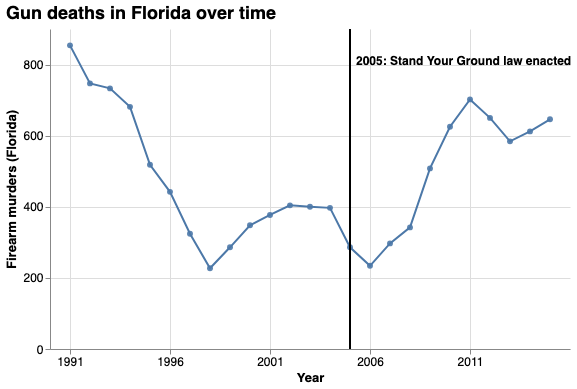

In [9]:
# YOUR ANSWER HERE
import pandas as pd
import altair as alt

guns = (
    pd.read_csv("data/guns-r-us.csv")
    .rename(columns={"Year": "year", "Firearm murders": "murders"})
)

law_year = 2005

base = alt.Chart(guns).encode(
    x=alt.X(
        "year:Q",
        title="Year",
        scale=alt.Scale(domain=[guns["year"].min(), guns["year"].max()]),
        axis=alt.Axis(values=list(range(int(guns["year"].min()), int(guns["year"].max()) + 1, 5)), format="d"),
    )
)

line = base.mark_line(strokeWidth=2).encode(
    y=alt.Y(
        "murders:Q",
        title="Firearm murders (Florida)",
        axis=alt.Axis(tickCount=6)
    )
)

points = base.mark_point(filled=True, size=35, opacity=0.9).encode(
    y="murders:Q"
)

# vertical reference line at the law year
vline = alt.Chart(pd.DataFrame({"year": [law_year]})).mark_rule(strokeWidth=2).encode(
    x="year:Q"
)

label = alt.Chart(pd.DataFrame({"year": [law_year], "murders": [guns["murders"].max()*0.95],
                                "txt": ["2005: Stand Your Ground law enacted"]})
                ).mark_text(align="left", dx=6, fontSize=12, fontWeight="bold").encode(
    x="year:Q",
    y="murders:Q",
    text="txt:N"
)

chart_33 = (line + points + vline + label).properties(
    width=520,
    height=320,
    title="Gun deaths in Florida over time"
).configure_title(
    fontSize=18,
    anchor="start"
).configure_axis(
    labelFontSize=12,
    titleFontSize=13,
    grid=True
).configure_view(
    stroke=None
)

chart_33

# My approval ratings are astronomical

## The data

The (fictional) `state-comparison.csv` dataset contains a sample of voters
from my state and a neighboring state of similar socioeconomic standard.
Voters in each state were asked to rate their approval of the state's
mayor on a scale from 0 - 10,000.

## My plots

### Altair

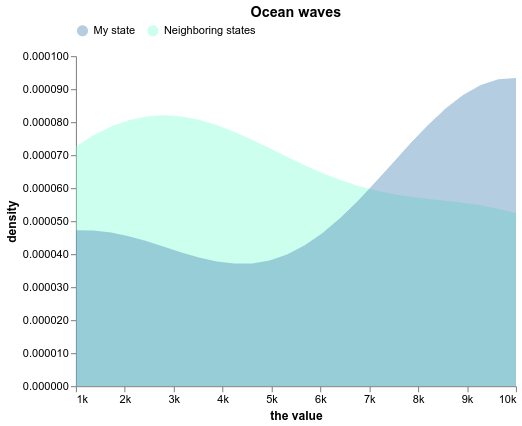

## My claim

My approval ratings are through the roof!
I am clearly doing a better job than my colleague and competitor next doors.
And as you can see we sampled enough people to get smooth curves,
which means that this difference is both likely to be statistically significant
and the magnitude is just too big to ignore.
There seems to be a few bores on the lower end of the spectrum,
but can't win them all I guess.

<div class="alert alert-info" style="color:black">

### Question 4.1
rubric={reasoning:2,writing:1}

<ul>
<li>Explain which mistakes (if any) I have done in my plot and provide an interpretation of the data that is more correct than mine. Be brief and clear in your answer.</li>
<li>You might have some ideas just from looking at my plot, but you will likely need to do some investigation yourself to answer this question fully. You can reference your improved plot as needed.</li>
</ul>
    
</div>

This claim is misleading because the plot shows densities, not the average approval or the proportion of people who approve. A higher peak only means more people fall near that score, and the two curves can still overlap a lot across the whole 0–10,000 range. In fact, my state also has a sizable mass at low ratings, so it is not clear that overall support is higher than in neighboring states. Also, the “smooth curves” come from KDE smoothing and do not by themselves imply statistical significance or a larger sample size.

<div class="alert alert-info" style="color:black">

### Question 4.2
rubric={accuracy:2}

<h4>Python</h4>
<p>Recreate the Altair version of the plot. Your plot should look as close as possible to mine in the image above.</p>
    
</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


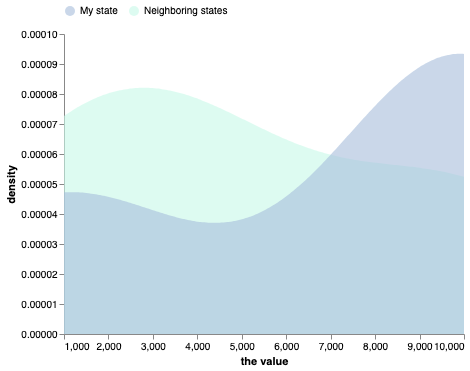

In [10]:
# YOUR ANSWER HERE
import altair as alt
import pandas as pd

# Load the data
df = pd.read_csv('data/state-comparison.csv')

# Create the overlapping density plot
ocean_waves = alt.Chart(df).transform_density(
    'the value',
    as_=['the value', 'density'],
    groupby=['where']
).mark_area(
    opacity=0.6,
    interpolate='monotone'
).encode(
    x=alt.X('the value:Q', 
            title='the value', 
            scale=alt.Scale(domain=[1000, 10000])),
    y=alt.Y('density:Q', title='density'),
    color=alt.Color(
        'where:N',
        scale=alt.Scale(
            domain=['My state', 'Neighboring states'],
            range=['#a6bddb', '#c7f9e8'] # Blue and Mint colors
        ),
        legend=alt.Legend(orient='top', title=None)
    )
).configure_view(
    stroke=None
).configure_axis(
    grid=False
)

ocean_waves

<div class="alert alert-warning" style="color:black">

### Question 4.3 (Optional)
rubric={viz:1}

<h4>Python</h4>
<p>Improve my Altair plot. Chose the best type of plot to accurately reveal what the data looks like. Design the plot to be an effective plot for communication purposes, this includes proper figure size, axis/figure titles, font sizes, colors, etc.</p>
    
</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


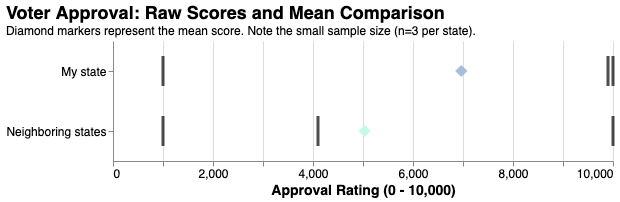

In [11]:
# YOUR ANSWER HERE
import altair as alt
import pandas as pd

df = pd.read_csv('data/state-comparison.csv')

ticks = alt.Chart(df).mark_tick(
    size=30, 
    thickness=3, 
    color='black'
).encode(
    x=alt.X('the value:Q', 
            title='Approval Rating (0 - 10,000)',
            scale=alt.Scale(domain=[0, 10000])),
    y=alt.Y('where:N', title=None)
)

means = alt.Chart(df).mark_point(
    shape='diamond',
    size=150,
    filled=True
).encode(
    x=alt.X('mean(the value):Q'),
    y=alt.Y('where:N'),
    color=alt.Color('where:N', legend=None, scale=alt.Scale(range=['#a6bddb', '#c7f9e8']))
)

improved_chart = (ticks + means).properties(
    width=500,
    height=120,
    title=alt.TitleParams(
        text="Voter Approval: Raw Scores and Mean Comparison",
        subtitle=["Diamond markers represent the mean score. Note the small sample size (n=3 per state)."],
        fontSize=18,
        anchor='start'
    )
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_view(
    stroke=None
)

improved_chart

<div class="alert alert-warning" style="color:black">

### Question 5 (Optional)
rubric={viz:0.5,reasoning:0.5}
    
<h4>R or Python</h4>
<p>Pick a existing ggplot or Altair chart and improve at least 3 different communication related aspects of this plot that we have discussed in lectures. In addition, show your proficiency in reading the documentation and looking for help online, by finding one communication related parameter that we have not discussed in lectures and use it to improve the visuals of the plot (it is also ok to use an option that we haven’t discussed of a parameter that we have discussed).</p>
<ol type="1">
<li>Paste in the code of the existing plot you picked and run it so that we can see what the original looked like. Include the URL to the original plot as a comment in the code cell.
<ul>
<li>You can take any plot you want! As long as you can find the source code and paste it here (and it is not copyright protected). There are suggestions for <a href="https://www.r-graph-gallery.com/">ggplot here</a> and <a href="https://altair-viz.github.io/gallery/index.html">Altair here</a>.</li>
</ul></li>
<li>In a new cell, make your modifications and plot the improved chart.</li>
<li>Briefly describe the changes you made and why they make this plot more suitable for communication. Explicitly mention which new parameter/option you picked that we have not discussed before and why you picked it.</li>
</ol>

</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


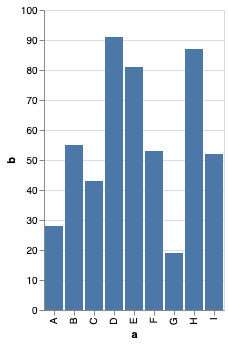

In [12]:
# YOU ANSWER TO #1 GOES HERE, REMEBER THE URL
import altair as alt
import pandas as pd

# Original plot from Altair Gallery: https://altair-viz.github.io/gallery/simple_bar_chart.html
source = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

original_chart = alt.Chart(source).mark_bar().encode(
    x='a',
    y='b'
)
original_chart

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


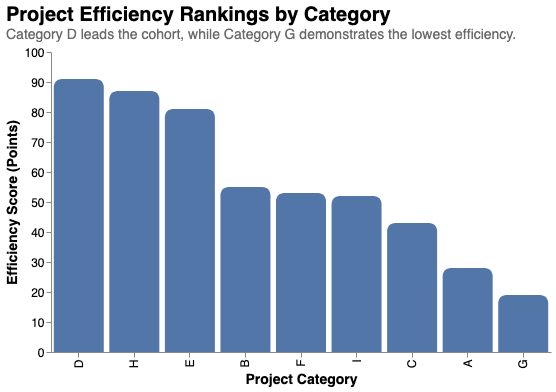

In [13]:
# YOU ANSWER TO #2 GOES HERE
import altair as alt
import pandas as pd

source = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'Value': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

improved_chart = alt.Chart(source).mark_bar(
    color='#5276A7',
    cornerRadiusTopLeft=8,  
    cornerRadiusTopRight=8  
).encode(
    x=alt.X('Category:N', sort='-y', title='Project Category'),
    y=alt.Y('Value:Q', title='Efficiency Score (Points)'),
).properties(
    width=500,
    height=300,
    title=alt.TitleParams(
        text="Project Efficiency Rankings by Category",
        subtitle="Category D leads the cohort, while Category G demonstrates the lowest efficiency.",
        anchor='start',
        fontSize=20,
        subtitleFontSize=14,
        subtitleColor='dimgray'
    )
).configure_axis(
    labelFontSize=12,
    titleFontSize=14,
    grid=False
).configure_view(
    stroke=None
)

improved_chart

The original chart was improved by sorting categories in descending order to reduce cognitive load and adding an active title that highlights the main takeaway. I minimized non-data ink by removing grid lines and the outer frame to focus attention on the values. Additionally, I applied the cornerRadius parameter—a styling option not covered in lecture—to give the bars a modern, professional look that increases visual engagement.

Ready to submit? 
I hope you had a favorable view of my data interpretations
or there might be trouble coming your way in lab4...

---

# Submission to Canvas

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`
2. Commit and push all your work (including the .ipynb file) to GitHub.
3. Submit a link to your repo on Canvas (this has to be done only once per group).